In [206]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Intro to Tensorflow

### Goals
- Gain a basic understanding of the what/how/why of Tensorflow
- Implement a simple multi-layer perceptron 

## Tensorflow Basics

Tensorflow (and other 'deep learning' libraries) are really good at gradient descent. 

Three types of objects
- Placeholders where we will use real data
- Variables. These are the model parameters - they can be updated using gradient descent.
- Constants.

Use these objects to construct a loss function. Then use gradient descent to find the best parameters, given the data.

### Constants

In [4]:
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0)

In [6]:
sess = tf.InteractiveSession()

In [7]:
sess.run([node1 + node2, node1, 2*node1])

[7.0, 3.0, 6.0]

### Placeholders
Placeholders are the objects that will be filled with real data at runtime

In [9]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

adder_node = a + b

In [11]:
sess.run(adder_node, feed_dict = {a:[3, .19], b:[8,0]})

array([ 11.  ,   0.19], dtype=float32)

### Variables

Think about the linear equation
$$
y = 3 x - 3
$$

In [16]:
x = tf.placeholder(tf.float32)

In [17]:
W = tf.Variable([3.], tf.float32)
b = tf.Variable([-3.], tf.float32)

linear_model = W * x + b

Variables need to be initialized

In [18]:
sess.run(tf.global_variables_initializer())

In [19]:
sess.run(linear_model, feed_dict = {x:[1, 2, 3]})

array([ 0.,  3.,  6.], dtype=float32)

Or we could define some y values and see how well it fits the model

In [21]:
y = tf.placeholder(tf.float32)

error = tf.square(linear_model - y)


sess.run(error, {x:[1, 2, 3], y:[3, 4, 5]})

array([ 9.,  1.,  1.], dtype=float32)

# Linear Regression

## Crime Data

In [23]:
from sklearn.model_selection import train_test_split

# Load some crime data
headers = pd.read_csv('comm_names.txt', squeeze=True)
headers = headers.apply(lambda s: s.split()[1])
crime = (pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data', 
                    header=None, na_values=['?'], names=headers)
         .iloc[:, 5:]
         .dropna()
         )

# Set target and predictors
target = 'ViolentCrimesPerPop'
predictors = [c for c in crime.columns if not c == target]

# Train/test split
X = crime[predictors]
y = crime[[target]]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

### Define the model

In [228]:
#We are going to estimate a linear regression model. First, we need to define all of the pieces of the model

#parameters
dim_input = X_train.shape[1]
dim_output = 1

#input
#Array to match the shape of X train
x = tf.placeholder(tf.float32, [None, dim_input])

#output
#column vector to match y_train
y_ = tf.placeholder(tf.float32, [None, 1])

#variables
#W is a matrix of model parameters, the dimensions of which will match the input - parameter for each input.
#Individual X is a row, want to multiply the X's by the rows W
#b is the beginning initialization of the intercepts
#we initialize these randomly, then through the training step below, we will update the parameters to minimize the loss function
W = tf.Variable(tf.random_normal([dim_input, dim_output]))
b = tf.Variable(tf.random_normal([dim_output]))

#Specify the functional form of the model
y = tf.matmul(x, W) + b

#Loss - define mean squared error
mse = tf.reduce_mean(tf.square(y - y_))
#define the regularization term which penalizes large parameters. Note the 11.8 here is arbitrary and can be played with
reg = tf.reduce_mean(11.8 * tf.square(W))

#define new loss function, we'll now minimize MSE plus regularization term
loss = mse + reg

#Optimizer
#AdamOptimizer is an 'adaptive' gradient descent in that it adjusts step sizes as it goes
optimizer = tf.train.AdamOptimizer(0.01)

#minimize loss
train_step = optimizer.minimize(loss)


Initialize

In [229]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [230]:
#view W's shape
#W has 121 rows (it's a column vector), these are the coefficients for the 121 variables in the input
#Above, we initialized these to random values. Gradient descent will find the true parameters
sess.run(W).shape

(121, 1)

View loss

In [231]:
sess.run(mse, {x:X_train, y_:y_train})

10.780749

In [232]:
#Run a training step (uses the optimizer above and tries to minimize mean squared error)
#After this step, mse should decrease and ultimately converge
sess.run(train_step, {x:X_train, y_:y_train})

In [233]:
#view error on training data to watch it converge
sess.run(mse, {x:X_train, y_:y_train})

8.6049089

In [234]:
#view error on testing data
sess.run(mse, {x:X_test, y_:y_test})

7.8574004

Parameters

### Exercise

1: Run 10000 gradient descent steps of the model above. Every 500 iterations, note the train error and the test error.

In [235]:
counter = 0

train_errors = []

while counter < 10000:
    #run train step
    sess.run(train_step, {x:X_train, y_:y_train})
    #increment counter
    counter += 1
    #get errors
    train_error = sess.run(mse, {x:X_train, y_:y_train})
    test_error = sess.run(mse, {x:X_test, y_:y_test})
    
    train_errors.append(train_error)
    if counter % 500 == 0:

        print 'Iteration ' + str(counter) + ' Train error is: ' + str(train_error) + ', Test error is: ' + str(test_error)
        print 
        



Iteration 500 Train error is: 0.0267927, Test error is: 0.0265614

Iteration 1000 Train error is: 0.0261429, Test error is: 0.0262311

Iteration 1500 Train error is: 0.0261454, Test error is: 0.02628

Iteration 2000 Train error is: 0.0261454, Test error is: 0.0263059

Iteration 2500 Train error is: 0.0261457, Test error is: 0.0263278

Iteration 3000 Train error is: 0.0261461, Test error is: 0.0263434

Iteration 3500 Train error is: 0.0261463, Test error is: 0.0263525

Iteration 4000 Train error is: 0.0261464, Test error is: 0.0263566

Iteration 4500 Train error is: 0.0261465, Test error is: 0.026358

Iteration 5000 Train error is: 0.0261465, Test error is: 0.0263583

Iteration 5500 Train error is: 0.0261464, Test error is: 0.0263419

Iteration 6000 Train error is: 0.0285499, Test error is: 0.027846

Iteration 6500 Train error is: 0.0261465, Test error is: 0.0263584

Iteration 7000 Train error is: 0.0261465, Test error is: 0.0263584

Iteration 7500 Train error is: 0.0261465, Test error 

Note, the regularized model converges much more quickly on the mean squared error.

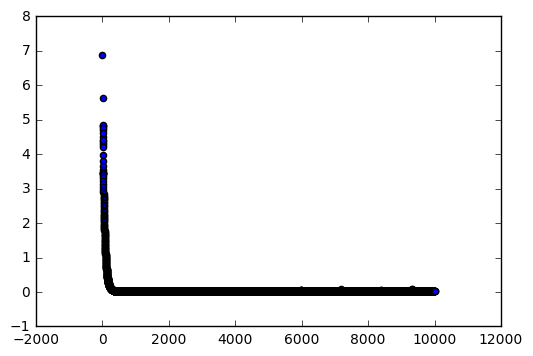

In [236]:
#create graph of how the MSE converges
x_values = np.arange(0, 10000, 1).tolist()

plt.scatter(x_values, train_errors)
plt.show()

2: Compare your results above to LinearRegression in scikit-learn.

In [212]:
#Look at the parameters from tensor flow
tensor_flow_params = sess.run(W)
tensor_flow_params.shape

(121, 1)

In [215]:
#sk learn linear regression

#instantiate model
linear_model = LinearRegression()

#fit to the training data
linear_model.fit(X_train, y_train)

#get parameters
lin_regression_coefs = linear_model.coef_.reshape(121,1)

In [ ]:
#Compare the parameters between the results from the neural net and the linear regression

3: In Week 5, we found that the best ridge regularization parameter for this data was alpha=11.8. Try to add the same amount of regularization to the tensorflow model above, then compare with ridge regression in scikit-learn.

# Multi-layer Perceptron (MLP)

![](mlp.png)

### Exercise

Build a multi-layer perceptron to predict crime rates.

Start with two hidden units. You should be able to define one matrix transforms the inputs to the hidden layer, and a second matrix that will transform the hidden layer to the output.

Don't forget add bias at each step and to apply a nonlinear transformation to the hidden layer (e.g. tf.nn.sigmoid())

In [ ]:
dim_hidden = 2

# input

# output

# Input to hidden


# Hidden to output


# Model


# Loss


# Optimizer


Once you have something working, it is time to tune your network to find the right number of hidden layers and amount of regularization.

1. Use your code block from above that performs gradient descent steps and records intermediate results.
2. You might want to force the optimizer to be stochastic. That is, feed it 100 random training examples at each step instead of the whole training dataset.
3. Start with two hidden units and try to get the regularization right. Then slowly increase the number of hidden units and continue tuning the regularization.
4. If the training error is high, you have too much bias. If the training and testing errors are very different, you have too much variance. If the training or testing errors are jumping all over the place, your step size is too high.

In [ ]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

# Bonus: Add _another_ hidden layer.

Can you decrease the MSE on the test set even further?

In [ ]:
dim_h1 = 8
dim_h2 = 8

# input
x = tf.placeholder(tf.float32, [None, dim_input])

# target
y_ = tf.placeholder(tf.float32, [None, 1])

# Input to hidden 1
W1 = tf.Variable(tf.random_normal([dim_input, dim_h1]))
b1 = tf.Variable(tf.random_normal([dim_h1]))

# Hidden 1 to hidden 2
W2 = tf.Variable(tf.random_normal([dim_h1, dim_h2]))
b2 = tf.Variable(tf.random_normal([dim_h2]))

# Hidden 2 to output
W3 = tf.Variable(tf.random_normal([dim_h2, dim_output]))
b3 = tf.Variable(tf.random_normal([1]))

# Model
H1 = tf.nn.tanh(tf.matmul(x, W1) + b1)
H2 = tf.nn.tanh(tf.matmul(H1, W2) + b2)
y = tf.matmul(H2, W3) + b3

# Loss
mse = tf.reduce_mean(tf.square(y - y_))
lam = .4
reg = tf.reduce_mean(lam * tf.square(W1)) + \
    tf.reduce_mean(lam * tf.square(W2)) + \
    tf.reduce_mean(lam * tf.square(W3))
loss = mse + reg

# Optimizer
train_step = tf.train.AdamOptimizer(0.0005).minimize(loss)

In [ ]:
sess = tf.InteractiveSession()

In [ ]:
tf.global_variables_initializer().run()

In [ ]:
for i in range(10000):
    idx = np.random.choice(X_train.shape[0], 150, replace=True)
    X_batch = X_train.iloc[idx, :]
    y_batch = y_train.iloc[idx, :]
    if i % 1000 == 0:
        train_mse = sess.run(mse, {x: X_batch, y_: y_batch})
        test_mse = sess.run(mse, {x: X_test, y_: y_test})
        print 'Iteration: {:04} \t Train Loss: {:.3} \t Test Loss: {:.3}'.format(i, train_mse, test_mse)
    batch_update(sess, X_train, y_train)